In [1]:
#Import
import numpy as np
import string
import pandas as pd
from matplotlib import pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

#### 1.1 Quelques outils

In [2]:
# Chargement de la matrice de transition pour English
E=np.loadtxt('bigramenglish.txt')
print("Shape of E is : ", E.shape)

Shape of E is :  (28, 28)


Dictionnaire clés-valeur associant les états qui sont des nombres entiers aux caractères

In [3]:
#Dictionnaire 
key_list= list(range(1,29))
value_list =[" "]+list(string.ascii_lowercase)+[" "]
dic={k:v for k,v in zip(key_list,value_list)}

print(dic)

{1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: ' '}


Inversion du dictionnaire

In [4]:
#A remarquer que les clés 1 et 28 ont la même valeur qui est un espace
dic_inv={k:v for v,k in dic.items()}
dic_inv[' ']=[1,28]
print(dic_inv)

{' ': [1, 28], 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27}


#### 1.2 Chaînes de Markov

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par
une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet
auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui
sert à terminer les mots.

La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1
correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin dmot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de
dictionnaire en python pour faire cette correspondance.

On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de
l’alphabet.

### 1.2.a Matrice de transitions

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux
symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition
correspond à la probabilité de transiter vers l’état j à partir de l’état i.

A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la
dernière colonne ?

Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre. 

In [5]:
# Etude de la première ligne de bigramenglish
print("Première ligne de E :\n", E[0, :], "\n")
print("La transition depuis 'etat initial' la plus problable est: état", np.argmax(E[0, :])+1, "\n")

Première ligne de E :
 [0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
 2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
 3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
 7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
 1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
 1.0599030e-02 5.2731491e-05 0.0000000e+00] 

La transition depuis 'etat initial' la plus problable est: état 21 



La première ligne de la matrice de transition correspond aux probabilités de passer de l'état initial qui est un  espace à  un des 28 états possible(espace/caractère).

Remarque: On remarque ici que les premier et dernier élément de cette ligne sont nuls: cela veut dire qu'il est impossible pour un mot, d'avoir un espace initial (état 1) suivi par un autre espace initial (état 1) ou par un espace final (état 28).

In [6]:
# Etude de la dernière colonne de bigramenglish
print("Dernière colonne de E :\n", E[:, -1], "\n")
print("La transition précédant 'etat final' la plus problable est : état", np.argmax(E[1:27, -1])+2)
print(" (mis à part la transition 'etat final' -> 'etat final', qui se fait avec proba=1).")

Dernière colonne de E :
 [0.0000000e+00 6.7478169e-02 7.1084433e-03 1.9535224e-02 5.9884373e-01
 3.6047379e-01 3.9653963e-01 3.1566736e-01 1.0300926e-01 2.4606608e-02
 9.5877277e-04 3.7225637e-01 1.5338255e-01 1.5795761e-01 2.9421872e-01
 1.2308174e-01 6.4222084e-02 1.3966480e-03 2.1088912e-01 4.3030156e-01
 2.2273059e-01 3.8466582e-02 9.9108028e-05 1.0216281e-01 1.2345679e-01
 7.7582944e-01 1.9193858e-03 1.0000000e+00] 

La transition précédant 'etat final' la plus problable est : état 26
 (mis à part la transition 'etat final' -> 'etat final', qui se fait avec proba=1).


La dernière colonne de la matrice de transition correspond aux probabilités de passer d'un des 28 états possibles(espace/caractère) à l'état final qui est un espace.

Remarque:On remarque qu'un 'etat final' (espace) ne peut êtr précédé d'un 'etat initial' (espace).

In [7]:
# Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

print('Transition la plus fréquente depuis chaque lettre :')

most_probable_next_state = np.argmax(E[1:27, :], axis=1) + 1

for idx, lettre in enumerate(list(string.ascii_lowercase)):
    most_probable = most_probable_next_state[idx]
    print("La transition la plus probable à partir de la lettre %s est l'etat %s" %(lettre,most_probable))

Transition la plus fréquente depuis chaque lettre :
La transition la plus probable à partir de la lettre a est l'etat 15
La transition la plus probable à partir de la lettre b est l'etat 6
La transition la plus probable à partir de la lettre c est l'etat 16
La transition la plus probable à partir de la lettre d est l'etat 28
La transition la plus probable à partir de la lettre e est l'etat 28
La transition la plus probable à partir de la lettre f est l'etat 28
La transition la plus probable à partir de la lettre g est l'etat 28
La transition la plus probable à partir de la lettre h est l'etat 6
La transition la plus probable à partir de la lettre i est l'etat 15
La transition la plus probable à partir de la lettre j est l'etat 16
La transition la plus probable à partir de la lettre k est l'etat 28
La transition la plus probable à partir de la lettre l est l'etat 6
La transition la plus probable à partir de la lettre m est l'etat 6
La transition la plus probable à partir de la lettre n 

#### 1.2.b Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.

In [8]:
def etat_suivant(q_t, E):
    
    assert(q_t >= 1 and q_t <= E.shape[0])  # Verification que q_t est bien un état existant
    
    # Somme cumulée des transitions pour l'état q_t
    fonctrep_E_q_t = np.cumsum(E[q_t-1])  # -1 car index de E = 0...27 
    
    # Tirage d'un nombre aléatoire dans [0,1] selon une loi uniforme
    r = np.random.random()
    
    # Trouve la transition correspondante
    q_tplus1 = sum((fonctrep_E_q_t < r)) + 1
    
    return q_tplus1

In [9]:
#On peut tester la fonction avec l'état 6 (la lettre 'e')
etat_suivant(6,E)

19

Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition
et expliquer son rôle pour la génération de l’état à t+1.

Etat courant : 8
Somme cumulative pour l'état 8 : 
[0.         0.06594212 0.06655269 0.06661375 0.06905605 0.19727683
 0.19733789 0.20954939 0.34509708 0.40798632 0.40804738 0.40810844
 0.43619489 0.43741605 0.4606179  0.52900232 0.52961289 0.52967395
 0.6267554  0.65301013 0.65911589 0.68048602 0.68054707 0.68115765
 0.68121871 0.68427158 0.68433264 1.        ]

Nombre aléatoire dans [0,1] : r = 0.15816734611728656


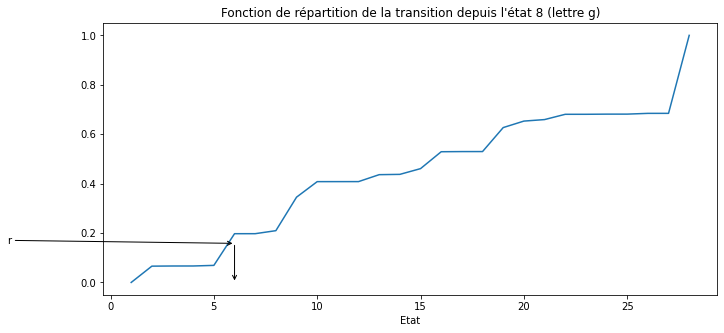

  ===> Etat suivant : 6


In [10]:
# Choisir aléatoirement un etat initial
listetat=list(dic.keys())
q_t=random.choice(listetat)
# Somme cumulée
fonctrep_E_q_t  = np.cumsum(E[q_t-1]) 
# Tirage aléatoire d'un nombre compris entre 0 et 1
r = np.random.random()

# Trouve l'état suivant
q_tplus1 = sum((fonctrep_E_q_t  < r)) + 1


# Affichage
print("Etat courant :", q_t)
print("Somme cumulative pour l'état %s : \n%s\n" % (q_t, fonctrep_E_q_t ))
print("Nombre aléatoire dans [0,1] : r =", r)

#plot
f, ax = plt.subplots(figsize=(11,5))
ax.plot(np.arange(1, 29), fonctrep_E_q_t )
ax.annotate("r", xy=(q_tplus1, r), xytext=(-5, r), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(q_tplus1, 0), xytext=(q_tplus1, r), arrowprops=dict(arrowstyle="->"))
plt.title("Fonction de répartition de la transition depuis l'état %s (lettre %s)" % (q_t, dic[q_t]))
plt.xlabel("Etat")
plt.show()

print("  ===> Etat suivant :", q_tplus1)

##### Explication du rôle de la la fonction de répartition pour une ligne de la matrice de transition pour la génération de l’état à t+1.

On affiche la somme cumulée des termes de E pour la ligne correspondant à l'état courant q_t choisi ici aléatoirement.

On tire aléatoirement un nombre r entre 0 et 1.

L'etat suivant est l'etat juste à droite de l'antécédent de r par la fonction de répartition.


Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28)

In [11]:
def genere_state_seq(E):
    # création d'une liste commencant par l'état inital
    seq = [1]  
    # Génération des états suivants jusqu'à tomber sur l'état final
    while seq[-1] != E.shape[0]:
        next_state = etat_suivant(seq[-1], E)
        seq.append(next_state)
    return seq

In [12]:
# Test
genere_state_seq(E)

[1, 9, 2, 15, 28]

Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire.

In [13]:
def display_seq(state_seq, dic):
    char_seq = [dic[q] for q in state_seq]
    return char_seq

 Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [14]:
# Test de génération de mots
nb_mots = random.randint(1,15)  # Choisir un nombre aléatoire qui est le nombre de mots à générer

print("Exemples de %s mot(s) généré(s) :" % nb_mots)
for i in range(nb_mots):
    state_seq = genere_state_seq(E)
    char_seq = display_seq(state_seq, dic)
    mot=''.join(char_seq)
    print("La suite  %s génère le mot: %s" %(state_seq, mot))

Exemples de 4 mot(s) généré(s) :
La suite  [1, 5, 28] génère le mot:  d 
La suite  [1, 2, 22, 21, 28] génère le mot:  aut 
La suite  [1, 14, 16, 21, 9, 2, 13, 6, 28] génère le mot:  mothale 
La suite  [1, 21, 20, 21, 9, 6, 20, 28] génère le mot:  tsthes 


### 1.2.c Génération de phrases

Créer un état final de phrase (état 29,correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1.
 Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [15]:
#Création du nouveau dictionnaire par ajout d'un état ('etat final de phrase')
dic_new = dic.copy()
dic_new[29]='.'
print(dic_new)

{1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: ' ', 29: '.'}


In [16]:
def modifie_mat_dic(E, dic): 
    # Modification de E
    E_new = np.zeros((E.shape[0]+1, E.shape[1]+1))
    
    # on garde identique les 27 premières lignes de E (transitions depuis état initial + 
    #les 26 lettres de l'alphabet)
    E_new[0:27, 0:28] = E[0:27, 0:28]
    
    # on passe a_28,29 à 0.1 (proba de passer d'un 'état final de mot' à un 'état final de phrase')
    E_new[27, 28] = 0.1
    
    # on passe a_28,1 à 1-0.1=0.9 (proba de passer d'un 'état final de mot' à un 'état initial de mot')
    E_new[27, 0] = 0.9
    
    # on passe a_29,29 à 1 (proba de passer d'un 'état final de phrase' à un 'état final de phrase')
    E_new[-1, -1] = 1
    
    return E_new, dic_new

In [17]:
E_new, dic_new=modifie_mat_dic(E, dic)
E_new.shape

(29, 29)

In [18]:
#Exemple de phrases générées
nb_2_phrases = random.randint(1,15)  # Choisir un nombre aléatoire qui est le nombre de phrases à générer
print("Affichage de %s phrases : " % nb_2_phrases)
for i in range(nb_2_phrases):
    char_seq = display_seq(genere_state_seq(E_new), dic_new)
    phrase=''.join(char_seq)
    print("%s  \n" % phrase)

Affichage de 14 phrases : 
 akeaw  onenout  oud  cheat  t  mimathis  n  acerillasmbereroioffrtherareand  f  oni  avede .  

 kean  he  ld  rdibe  ousathe  c  lawl  of .  

 u .  

 wantiouticabofilroutohe  ileaminlderiok  cher  fisms  end  an  os  ls  ten  ly  f  pe  ce  ay  is  bere  id  ohe  f  s  pame  chi  r  w  dutit  chofingn  te  ct  hed  m .  

 ithed  tetare .  

 ct  rg .  

 ast  in .  

 thesed  huthece  a  m  he  gn  mains  as  the  ingad  ndd  expethugat  frithm  sus  t .  

 hatrd  the  thevie .  

 fe  waborald  sof .  

 ag  nis  car  is  twherepar  folyoforsttheinthase .  

 onoiomint  t .  

 ft .  

 acor  t  are  o  f  hng  rred  hechely  araintl  haveacede  s  hr  safthivis  athereriodyoof  corld  tomand  s .  



### 1.3. Reconnaissance de la langue

In [19]:
# Chargement de la matrice de transition pour English
F=np.loadtxt('bigramfrancais.txt')
print("La matrice F a pour dimensions : ", F.shape)

La matrice F a pour dimensions :  (28, 28)


In [20]:
#Nouvelle matrice de transition pour le français
F_new, dic_new=modifie_mat_dic(F, dic)
F_new.shape

(29, 29)

In [21]:
#Exemple de phrases générées en anglais
nb_2_phrases = random.randint(1,15)  # Choisir un nombre aléatoire qui est le nombre de phrases à générer
print("Affichage de %s phrases : " % nb_2_phrases)
for i in range(nb_2_phrases):
    char_seq = display_seq(genere_state_seq(F_new), dic_new)
    phrase=''.join(char_seq)
    print("%s  \n" % phrase)

Affichage de 10 phrases : 
 de  ls  pa  dexir  ls  u .  

 naniogre  del  de  ane  n  mum  amecen  liomembu  ele  urierounceletonoiviconcentykx  s  prc  domatiout  le  pes  ylel  lanouens  ces  a .  

 s  aulerefte  dignt  desontienogempr  s  lines  s  l .  

 d  curice .  

 cr  tonnsoiome  u  esacantpanciprebur  delonetens  pe  dogles  aus  de  u .  

 s  lomomperou  de  deuxede  insoccent  crebives  lle  dourogpam  ans  ll  usalibri  dele  don  apqut  gibies  nenetonc  paje  digrmes  is  letente  at  la  aronet  le  aun  nenon  a  difans  dent  des  gietauetile  pames  cr  clonteple  les  debux  lereis  nisapelele  peves  ut  cit  de .  

 meurels  demeleureme  ciomeblitiaitaiqu  loueut  couria  deuttribus  lece .  

 atoncaline  lodr  ales  den  fides  des  purs  ante  l  l  lirammuroures  t  ces  ls  e  pebun .  

 atys  ctis  pt  patroribrrrogre  d  licerogicux  ourceefoue  dut  dilontileuesis  prcun  drocopachelons  din  e  la  dous .  

 lis  lle  ussoga  r  nogestibuniroicis  

In [22]:
#Remplacement des valeurs des états final et initial par les signes - et +
dic_vraisemblance=dic_new.copy()
dic_vraisemblance[1]='-'
dic_vraisemblance[28]='+'
print(dic_vraisemblance)

{1: '-', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: '+', 29: '.'}


In [23]:
#Exemple de phrases générées en remplacant les espaces de debut et de fin de mot par - et plus
def transforme(sentence):
    transformedsentence = '-'
    for charac in sentence:
        if charac == ' ':
            transformedsentence += '+'
            transformedsentence += '-'
        elif charac == '.':
            transformedsentence += '+'
            transformedsentence += charac
        else:
            transformedsentence += charac
    return transformedsentence

print(transforme("to be or not to be."))

-to+-be+-or+-not+-to+-be+.


In [24]:
dic_invraisemblance={k:v for v,k in dic_vraisemblance.items()}
print(dic_invraisemblance)

{'-': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '+': 28, '.': 29}


In [25]:
#Ecriture d'une fonction calc_vraisemblance qui calcule la vraisemblance du modèle anglais pour une phrase donnée 
def calc_vraisemblance(sentence):
    #transformation d'une phrase en une suite detat
    dic_invraisemblance={k:v for v,k in dic_vraisemblance.items()}
    state_seq = [int(dic_invraisemblance[state]) for state in transforme(sentence)]
    #Calcul de vraissemblance
    vraisemblance = 1 # initialisation
    for idx, q_t in enumerate(state_seq[:-1]):
        q_tplus1 = state_seq[idx + 1]
        vraisemblance *= E_new[q_t-1, q_tplus1-1]   # -1 car l'indexation de E commence à partir de 0
    return vraisemblance

In [26]:
#Calcul de la vraisemblance de «to be or not to be.»
calc_vraisemblance("to be or not to be.")

8.112892227809415e-20

In [27]:
def calc_vraisemblancef(phrase):
    #transformation d'une phrase en une suite detat
    dic_invraisemblance={k:v for v,k in dic_vraisemblance.items()}
    state_seq = [int(dic_invraisemblance[etat]) for etat in transforme(phrase)]
    #Calcul de vraissemblance
    vraisemblance = 1 # initialisation
    for idx, q_t in enumerate(state_seq[:-1]):
        q_tplus1 = state_seq[idx + 1]
        vraisemblance *= F_new[q_t-1, q_tplus1-1]   # -1 car l'indexation de E commence à partir de 0
    return vraisemblance

In [28]:
#Calcul de la vraisemblance de «etre ou ne pas etre.»
calc_vraisemblancef("etre ou ne pas etre.")

1.145706887234789e-19

In [29]:
#Calcul de la vraisemblance en anglais de cette même phrase «etre ou ne pas etre.»
express = "etre ou ne pas etre."
calc_vraisemblance(express)

4.462288711775253e-24

Pour se fixer les idées et voir plus clair, prenons quelques exemples de phrases et calculons les vraisemblances en anglais et en français

In [30]:
phrase1="cet institut de formation est la meilleure."
phrase2="ce module est genial."
phrase3="le professeur sait donner des choses interessantes pour reussir."

In [31]:
#Calucl de la vraisemblance de chacune des phrases avec le modèle français suivi du modèle anglais
print("Avec le modèle français, on a : %s et le modèle anglais donne : %s " 
      %(calc_vraisemblancef(phrase1),calc_vraisemblance(phrase1)))
#Comparaisons des vraisemblances
print("La vraisemblance avec le modèle français est lpus élevée :%s"
      %(calc_vraisemblancef(phrase1)>calc_vraisemblance(phrase1)))

print("Avec le modèle français, on : %s et le modèle anglais donne : %s "
      %(calc_vraisemblancef(phrase2),calc_vraisemblance(phrase2)))
print("La vraisemblance avec le modèle français est lpus élevée :%s"
      %(calc_vraisemblancef(phrase2)>calc_vraisemblance(phrase2)))

print("Avec le modèle français, on : %s et le modèle anglais donne : %s "
      %(calc_vraisemblancef(phrase3),calc_vraisemblance(phrase3)))

print("La vraisemblance avec le modèle français est lpus élevée :%s"
      %(calc_vraisemblancef(phrase3)>calc_vraisemblance(phrase3)))


Avec le modèle français, on a : 9.511294494864142e-44 et le modèle anglais donne : 1.1475223699235214e-48 
La vraisemblance avec le modèle français est lpus élevée :True
Avec le modèle français, on : 2.916084575746577e-25 et le modèle anglais donne : 9.542855117597007e-26 
La vraisemblance avec le modèle français est lpus élevée :True
Avec le modèle français, on : 6.272896857344544e-66 et le modèle anglais donne : 2.1852914433538488e-73 
La vraisemblance avec le modèle français est lpus élevée :True


##### Pour ces trois phrases en français, on constate que la vraisemblance avec modèle français est plus élevée.

Prenons des exemples avec des phrases en anglais

In [32]:
sentence1="i am going at school"
sentence2="i love machine learning"
sentence3="this test learns me wonderful things"

In [33]:
#Calucl de la vraisemblance de chacune des phrases avec le modèle français suivi du modèle anglais
print("Avec le modèle français, on a : %s et le modèle anglais donne : %s " 
      %(calc_vraisemblancef(sentence1),calc_vraisemblance(sentence1)))
#Comparaisons des vraisemblances
print("La vraisemblance avec le modèle français est moins élevée :%s"
      %(calc_vraisemblancef(sentence1)<calc_vraisemblance(sentence1)))

#Calucl de la vraisemblance de chacune des phrases avec le modèle français suivi du modèle anglais
print("Avec le modèle français, on a : %s et le modèle anglais donne : %s " 
      %(calc_vraisemblancef(sentence2),calc_vraisemblance(sentence2)))
#Comparaisons des vraisemblances
print("La vraisemblance avec le modèle français est moins élevée :%s"
      %(calc_vraisemblancef(sentence2)<calc_vraisemblance(sentence2)))
#Calucl de la vraisemblance de chacune des phrases avec le modèle français suivi du modèle anglais
print("Avec le modèle français, on a : %s et le modèle anglais donne : %s " 
      %(calc_vraisemblancef(sentence3),calc_vraisemblance(sentence3)))

#Comparaisons des vraisemblancescal
print("La vraisemblance avec le modèle français est moins élevée :%s"
      %(calc_vraisemblancef(sentence3)<calc_vraisemblance(sentence3)))

Avec le modèle français, on a : 1.5285650415215667e-37 et le modèle anglais donne : 1.2693803996666022e-24 
La vraisemblance avec le modèle français est moins élevée :True
Avec le modèle français, on a : 5.762904322106447e-32 et le modèle anglais donne : 1.260075907579091e-25 
La vraisemblance avec le modèle français est moins élevée :True
Avec le modèle français, on a : 3.001341656443278e-54 et le modèle anglais donne : 5.7788659120719706e-36 
La vraisemblance avec le modèle français est moins élevée :True


##### On remarque ici que pour ces phrases en anglais, la vraisemblance du modèle anglais est plus élevée.

### Mot de la fin

In [34]:
#Essayons avec quelques phrases et/ou expressions particulières
expression1="le tas sur la table"
expression2="la machine est sur la table"

In [35]:
calc_vraisemblancef(expression1) > calc_vraisemblance(expression1)

False

In [36]:
calc_vraisemblancef(expression2) > calc_vraisemblance(expression2)

False

On peut dire que pour les phrases en anglais, la vraisemblance du modèle anglais est plus élevée que celle du modèle français. De. même pour les phrases en français, la vraisemblance du modèle français est plus élevée que celle du modèle en anglais.

Cependant, si nous considérons ceci comme une règle, il faut préciser qu'il y'a des exceptions comme le montre les contre exemple (expression1 et expression2).

Nous pouvons alors conclure notre modèle a des limites et pouvons penser à un modèle plus performant.